In [183]:
!pip install gensim
import os
import urllib.request
import matplotlib.pyplot as plt
from scipy import spatial
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from gensim.models import Word2Vec
import pandas as pd
import nltk
import random
import gensim.downloader
import re
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
import numpy as np


[notice] A new release of pip available: 22.2.2 -> 22.3
[notice] To update, run: python.exe -m pip install --upgrade pip
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\otili\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\otili\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [4]:
# model = Word2Vec(sentences=tokens, vector_size=10, window=1, min_count=1, hs=1, negative=0)
# X = [model.wv[word] for word in model.wv.index_to_key]
text = "Word embedding is the collective name for a set of language modeling and feature learning techniques in natural language processing where words or phrases from the vocabulary are mapped to vectors of real numbers. Conceptually it involves a mathematical embedding from a space with many dimensions per word to a continuous vector space with a much lower dimension.The use of multi-sense embeddings is known to improve performance in several NLP tasks, such as part-of-speech tagging, semantic relation identification, and semantic relatedness. However, tasks involving named entity recognition and sentiment analysis seem not to benefit from a multiple vector representation."

In [22]:
# glove_vectors = gensim.downloader.load('glove-wiki-gigaword-50')
# word2vec_vectors = gensim.downloader.load('word2vec-google-news-300')

[==================================================] 100.0% 66.0/66.0MB downloaded
[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [184]:
stop_words = set(stopwords.words('english'))

In [264]:
def plot_embeddings(pretrained_vector, limit=1000, slice=30):
    vocab = pretrained_vector.index_to_key[:limit]
    tokens = [word for word in vocab if re.match(r"[a-z]{2,}", word)]
    tokens = [word for word in tokens if not word.lower() in stop_words]

    X = [pretrained_vector[word] for word in tokens]
    X = np.array(X)

    tsne = TSNE(n_components=2)
    X_tsne = tsne.fit_transform(X)

    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)
    
    n = X.shape[1]
    dimensions = random.sample(list(range(n)), 2)

    fig, ax = plt.subplots(1, 3, figsize=(18, 6))
    
    ax[0].scatter(X_tsne[:slice, 0], X_tsne[:slice, 1], linewidths=5, color='lightpink')
    ax[0].set_xlabel("PC1", size=8)
    ax[0].set_ylabel("PC2", size=8)
    ax[0].set_title("TSNE")

    ax[1].scatter(X_pca[:slice, 0], X_pca[:slice, 1], linewidths=5, color='lightblue')
    ax[1].set_xlabel("PC1", size=8)
    ax[1].set_ylabel("PC2", size=8)
    ax[1].set_title("PCA")

    ax[2].scatter(X[:slice, dimensions[0]], X[:slice, dimensions[1]], linewidths=5, color='lightgreen')
    ax[2].set_xlabel("PC1", size=8)
    ax[2].set_ylabel("PC2", size=8)
    ax[2].set_title("Random dimensions")

    for i, word in enumerate(tokens[:slice]):
        ax[0].annotate(word, xy=(X_tsne[i, 0], X_tsne[i, 1]), c='black')

    for i, word in enumerate(tokens[:slice]):
        ax[1].annotate(word, xy=(X_pca[i, 0], X_pca[i, 1]), c='black')

    for i, word in enumerate(tokens[:slice]):
        ax[2].annotate(word, xy=(X[i, dimensions[0]], X[i, dimensions[1]]))

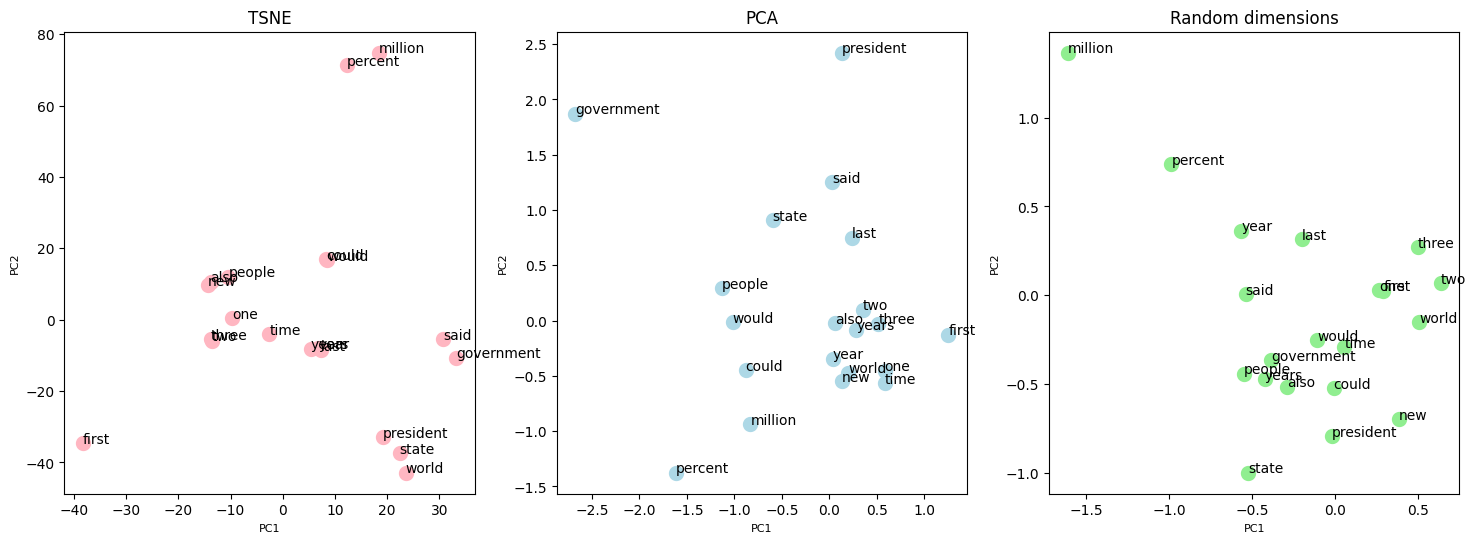

In [267]:
plot_embeddings(glove_vectors, 5000, 20)

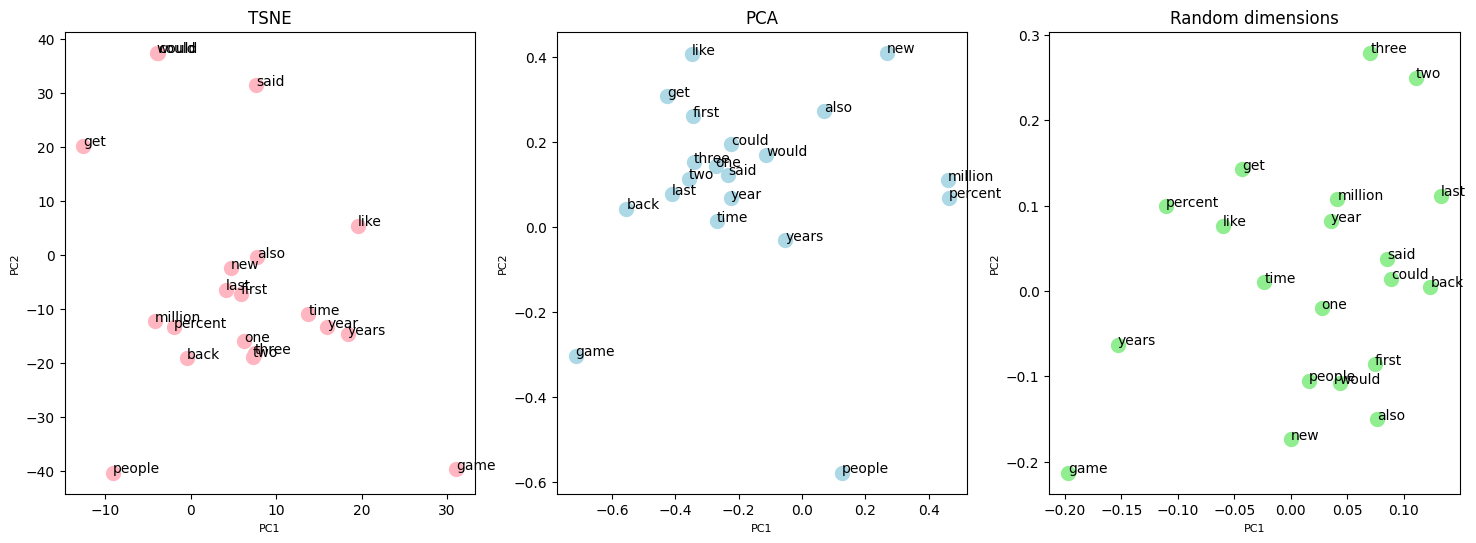

In [268]:
plot_embeddings(word2vec_vectors, 5000, 20)